OR 568 Midterm Question 1

Problem: On January 24, 2017 Donald Tramp tweeted about "horrible" murder rate in Chicago.
Our goal is to analyze the data and check how statistically signicant such a statement. I downloaded
Chicago's crime data from the data portal: data.cityofchicago.org. This data contains reported incidents
of crime (with the exception of murders where data exists for each victim) that occurred in the City of
Chicago from 2001 to present, minus the most recent seven days. Data is extracted from the Chicago Police
Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the
privacy of crime victims, addresses are shown at the block level only and specic locations are not identied.
This data set has 6.3 million records. Each crime incident is categorized using one of the 35 primary crime
types: NARCOTICS, THEFT, CRIMINAL TRESPASS, etc.. I frittered incidents of type HOMICIDE into a
separate data set stored in chi_homicide.rds. 

a) Create a heat map for the homicide incidents. In which areas of the city you think houses are very
affordable and in which they are not?

b) Create a map by plotting a dot for each of the homicide incidents. You will see similar picture as you
saw with the heat plot. Look at the Hyde Park area in the south side Chicago. There is an "island" with
no homicide incidents! Can you explain why? Hint: You might want open Google maps in your browser
and zoom-in into this area.

c) Though president't tweet is consistent with the data (goo.gl/VTPzFw), observing 52 homicides in January
is not that unusual. Calculate the total number of homicides for each January. Use bootstrap to estimate
95% condidence interval for the mean over January homicides. Is 52 within the interval? Calculate
confidence interval using t-ratio. Do you think results from t-ratio based calculations are reliable?

d) The history of 2001-present data is rather short. Chicago tribune provided total number of homicides
for Chicago for each month of the 1957-2014 period. Use this data set and calculate the confidence
interval for using bootstrap and t-ratio. Further answer the following questions: (i) Assuming monthly
homicide rate follows Normal distribution, what is the probability that we observe 52 homicides or more?
(ii) Do you think Normality assumption is valid? (iii) Assuming monthly homicide rate follows Poisson
distribution, what is the probability that we observe 52 homicides or more?

e) There is a hypothesis that crime rates are related to temperatures (goo.gl/nPpHwv). Check this hy-
pothesis using simple regression. Use linear model to regress homicide rate to the average maximum temperature. Does this relation appear significant? Perform residual diagnostics and nd outliers and
leverage points.

f) There is another hypothesis that rise in murder is related to the pullback in proactive policing that
started in November of 2015 as a result of Laquan McDonald video release (https://goo.gl/7cm1CC,
https://goo.gl/WcH2uB). I calculated total number of homicides for each day and split data into two
parts: before and after video release. Using t-ratio, check the hypothesis H0: the homicide rate did not
change after video release.
was at least partly related to a pullback in proactive policing since 2015

Part A

,ID,Case.Number,Block,IUCR,Primary.Type,Description,Location.Description,Arrest,Domestic,Beat,District,Ward,Community.Area,FBI.Code,Year,Latitude,Longitude,DateTime,Month
7961,634,G000705,024XX W MONROE ST,0110,HOMICIDE,FIRST DEGREE MURDER,CHA STAIRWELL,false,false,1125,11,2,28,01A,2001,41.88022,-87.68825,2001-01-01 10:40:00,1
7962,635,F803142,023XX N MILWAUKEE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,false,false,1414,14,35,22,01A,2001,41.92449,-87.69993,2001-01-01 15:10:00,1
7970,643,D362053,002XX E 46 ST,0110,HOMICIDE,FIRST DEGREE MURDER,ABANDONED BUILDING,false,false,221,2,NA,NA,01A,2001,41.81113,-87.62079,2001-01-04 22:05:00,1
7963,636,G008548,035XX W 12 PL,0110,HOMICIDE,FIRST DEGREE MURDER,BASEMENT,true,false,1021,10,NA,NA,01A,2001,41.86516,-87.71373,2001-01-04 22:30:00,1
7965,638,G008793,016XX W 80 ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,false,false,611,6,NA,NA,01A,2001,41.74851,-87.66493,2001-01-05 16:22:00,1
7966,639,G011288,017XX S ASHLAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,false,false,1222,12,25,31,01A,2001,41.85847,-87.66617,2001-01-06 08:54:00,1


[1] 8330   19

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=Chicago&zoom=11&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chicago&sensor=false


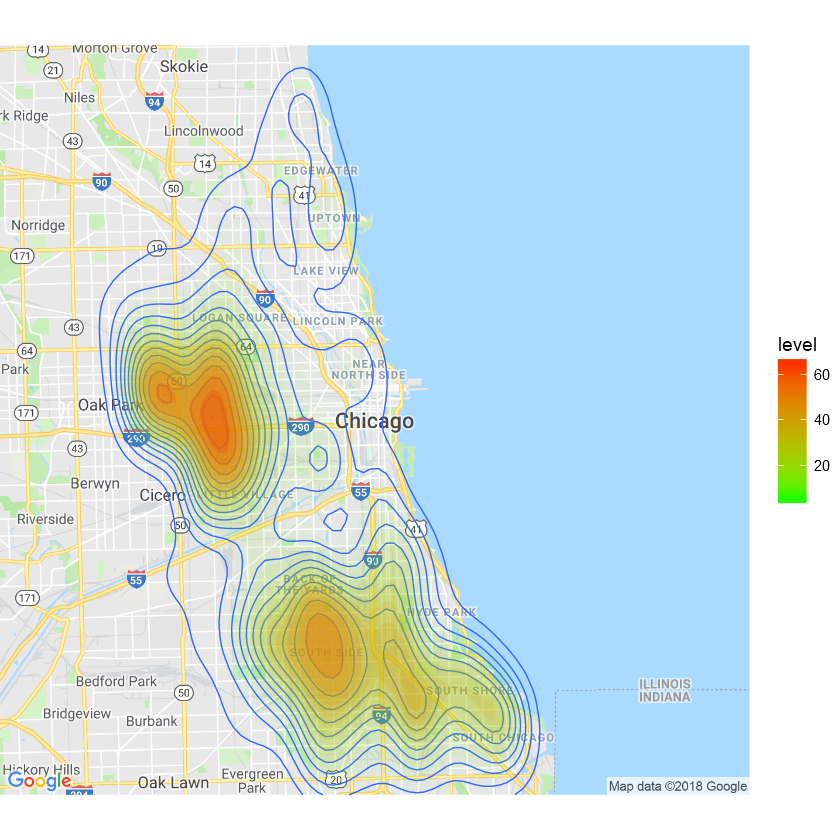

In [7]:
library(dplyr)
library(lubridate)

chi_hom = readRDS("chi_homicide.rds")
chi_hom = chi_hom[order(chi_hom$DateTime) , ] # sort by time and date
head(chi_hom)
dim(chi_hom)

library(ggmap)
library(ggplot2)
chi_map <- get_map(location = "Chicago", maptype = "roadmap", zoom = 11)

ggmap(chi_map, extent = "device") + 
  geom_density2d(data = chi_hom, aes(x = Longitude, y = Latitude), size = 0.3) + 
  stat_density2d(data = chi_hom, aes(x = Longitude, y = Latitude, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") + 
  scale_fill_gradient(low = "green", high = "red") + scale_alpha(range = c(0, 0.3), guide = FALSE)

It looks like the lakefront area, especially Lincoln Park and the Near North Side are the most expensive areas dur to low crime. Similarly, the Garfield Park area and the South Side have higher rates of crime, which should make those areas more affordable to live.

Part B

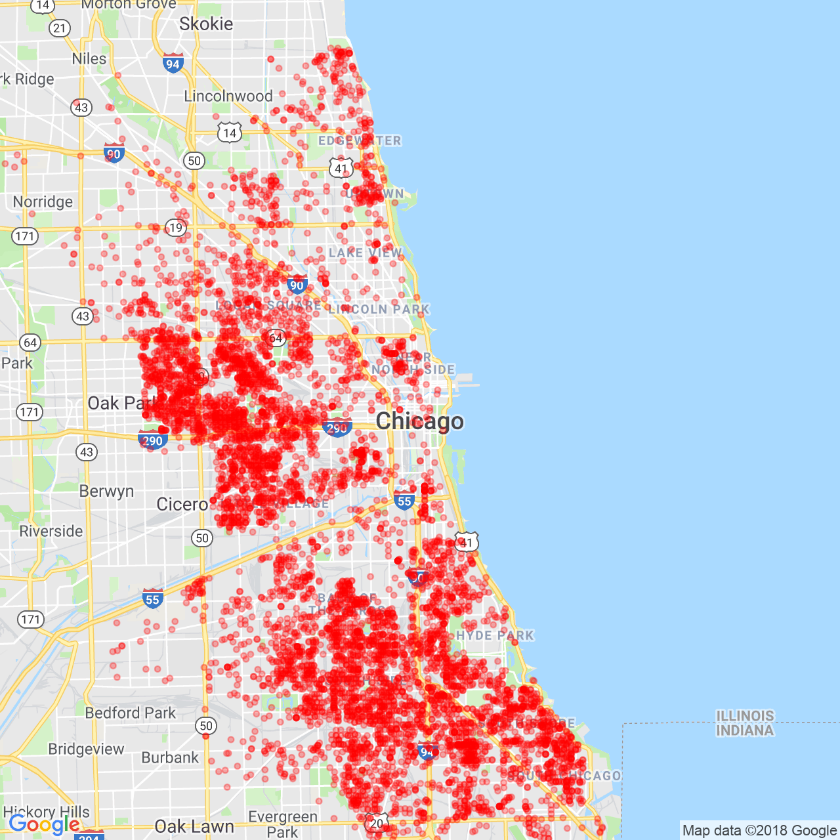

In [8]:
ggmap(chi_map, extent = "device") + geom_point(aes(x = Longitude, y = Latitude), colour = "red", alpha = 0.3, size = 1, data =chi_hom)

This location in Hyde Park is the home of the University of Chicago, a private research university and one of the top colleges in the world. The presence of such a high-end university would lead to lower crime in the immediate surrounding area.

Part C

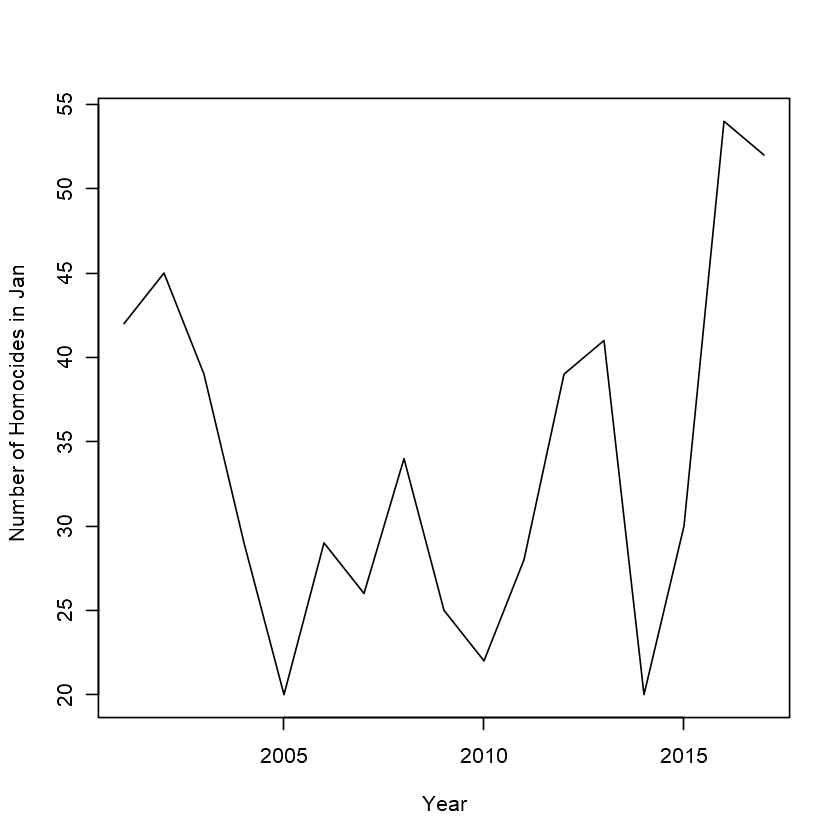

In [9]:
chi_hom_jan = chi_hom %>% group_by(Year, Month) %>%
   summarise(homocide = n()) %>%
  filter(Month == 1)

plot(chi_hom_jan$Year,chi_hom_jan$homocide, type='l', xlab="Year", ylab="Number of Homocides in Jan")

[1] 29 29 39 20 45 34 45 22 30 45 54 39 39 29 41 29 20

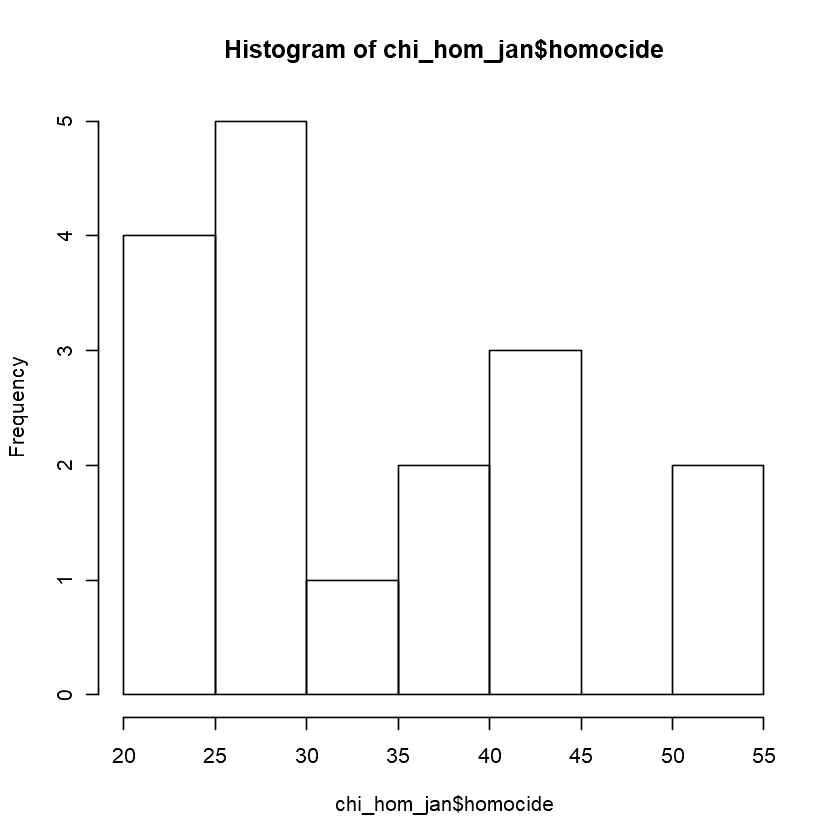

  [1]  1.59  1.53 -1.00  3.47 -1.06  3.47  0.88  3.76 -0.53  1.71 -1.29  0.47
 [13]  0.06  3.18 -0.88  1.12  3.35 -2.94 -0.12 -3.35  3.53 -3.47  1.94  0.76
 [25] -5.47  2.06  1.47 -4.53 -2.53 -0.76  0.65 -0.29  1.82 -2.47 -4.82 -0.59
 [37]  0.76 -2.00 -3.00  1.18  0.76  1.47 -3.47 -1.24 -2.59  4.18  0.41  1.29
 [49]  2.59 -0.18 -2.29  1.76  0.88  3.18  2.00 -0.12 -3.41  6.82 -1.12  1.29
 [61]  2.47 -0.82 -0.76  2.35 -0.82  0.65 -2.06  2.88  0.00 -0.53 -0.12  2.06
 [73]  2.35 -2.18  2.00 -5.24  1.12  2.29 -1.35  0.24 -3.24  5.18  1.06 -2.18
 [85] -3.18 -2.88 -3.76  1.65  1.35 -2.06  1.24  0.00 -1.65 -0.59  0.76 -0.59
 [97]  1.94 -2.41 -0.06  6.59  1.65  0.29  2.12  1.18  1.06 -2.94 -0.06 -0.18
[109]  1.18  3.94  1.35 -0.65  0.94 -1.12 -1.29  2.71  0.82  1.59  3.18 -2.76
[121] -0.53  2.41  2.71  2.94  2.18  1.71 -3.12  2.41  0.53 -0.35  0.76  1.24
[133] -2.94  2.59 -0.12  1.24 -2.24 -2.35 -1.06 -0.71 -1.82 -3.41  2.82  1.47
[145] -3.00  0.18  4.18  5.59  0.24 -1.59  3.47 -3.53  5.71  1.8

[1] 33.94382

   97.5%     2.5% 
28.23235 38.65735 


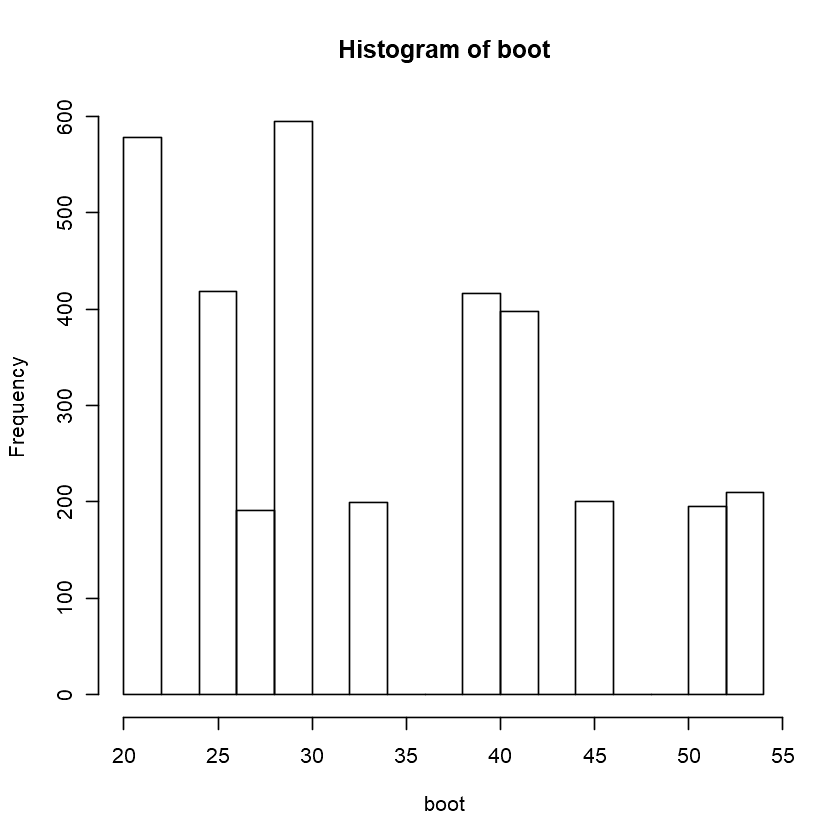

In [22]:
# Use bootstrap to calculate 95% confidence interval for the mean over January homicides Is 42  is in side the interval?
hist(chi_hom_jan$homocide)
x = mean(chi_hom_jan$homocide)
sample(chi_hom_jan$homocide, length(chi_hom_jan$homocide), replace = TRUE, prob = NULL)
boot = replicate(200, sample(chi_hom_jan$homocide, length(chi_hom_jan$homocide), replace = TRUE, prob = NULL))
hist(boot)
boot = matrix(boot, nrow = length(chi_hom_jan$homocide))
delt = colMeans(boot) - x
print(delt, digits = 1)
mean(colMeans(boot))
d = quantile(delt, c(0.025, .975))
ci = (x - c(d[2], d[1]))
print(ci)

52 homicide deaths is well outside the 95% confidence interval of the bootstrapped data, which goes from 28.8 deaths to 38.6 deaths.

In [11]:
# calculate probability of observing 52 or more homicides in January
mu = mean(chi_hom_jan$homocide)
sd = sd(chi_hom_jan$homocide)

n = sqrt(length(chi_hom_jan$homocide))
ci2low = mu - 1.96 *(sd / n)
ci2up = mu + 1.96 *(sd / n)
print(ci2low)
print(ci2up)
pnorm(52, mean = mu, sd = sd, lower.tail = F)

[1] 28.79484
[1] 38.85222


[1] 0.04287566

There is a 4.3% chance of 52 homicides occuring based on the previous distribution.However, the distribution of the data is not very normal (it is tilted towards lower numbers) so there is reason to doubt this finding.

year,january,february,march,april,may,june,july,august,september,october,november,december
1957,12,21,16,25,29,28,32,31,29,20,28,25
1958,19,20,20,29,34,27,22,28,29,25,24,28
1959,26,26,15,20,25,26,42,41,27,26,28,29
1960,29,29,25,35,28,35,40,35,29,27,31,29
1961,31,19,36,27,38,38,29,38,31,21,26,28
1962,35,34,33,17,26,41,35,33,34,24,34,39


[1] 59 12

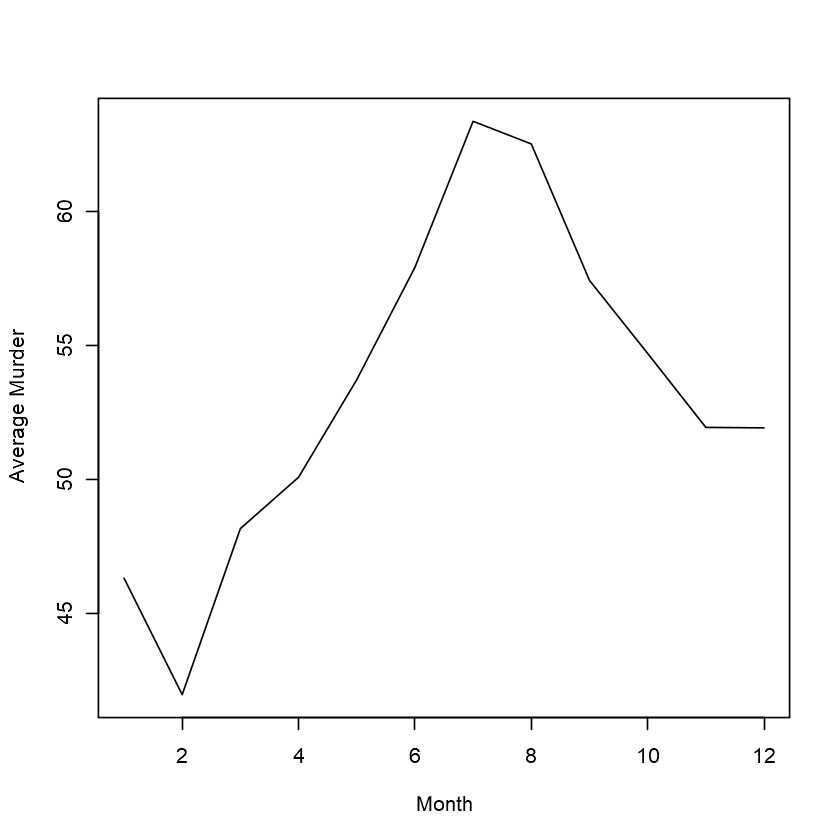

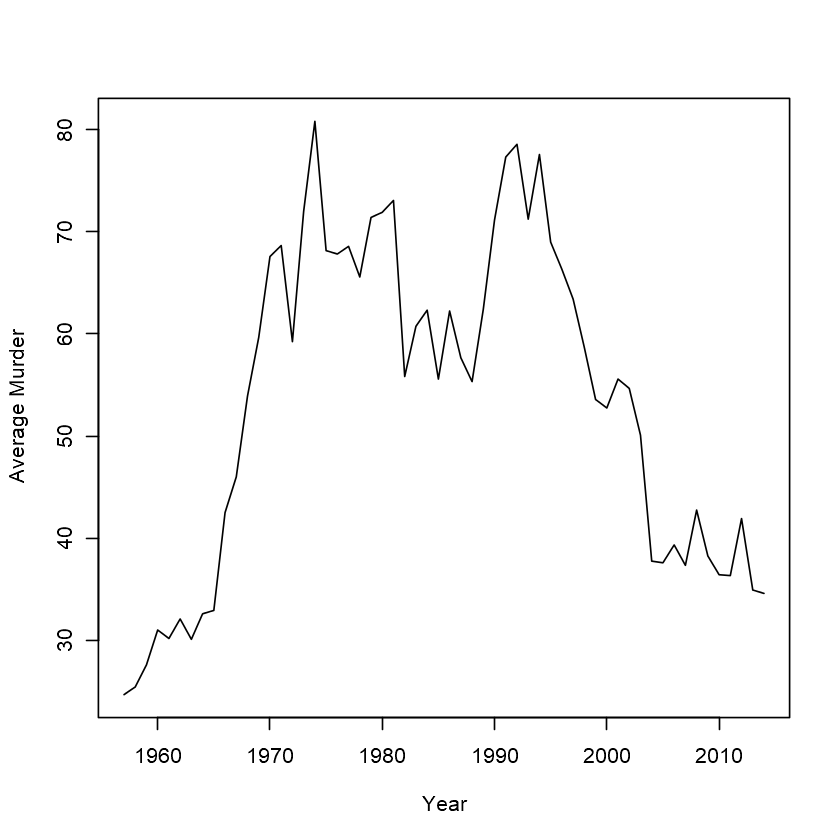

[1] 52 39 22 40 61 34 66 61 51 22 35 35 57 29 46 75 29 20 57 27 22 61 29 12 38
[26] 39 54 22 19 38 39 43 31 20 47 63 25 34 71 43 20 22 46 53 53 75 74 22 67 66
[51] 51 39 78 38 65 40 46 31

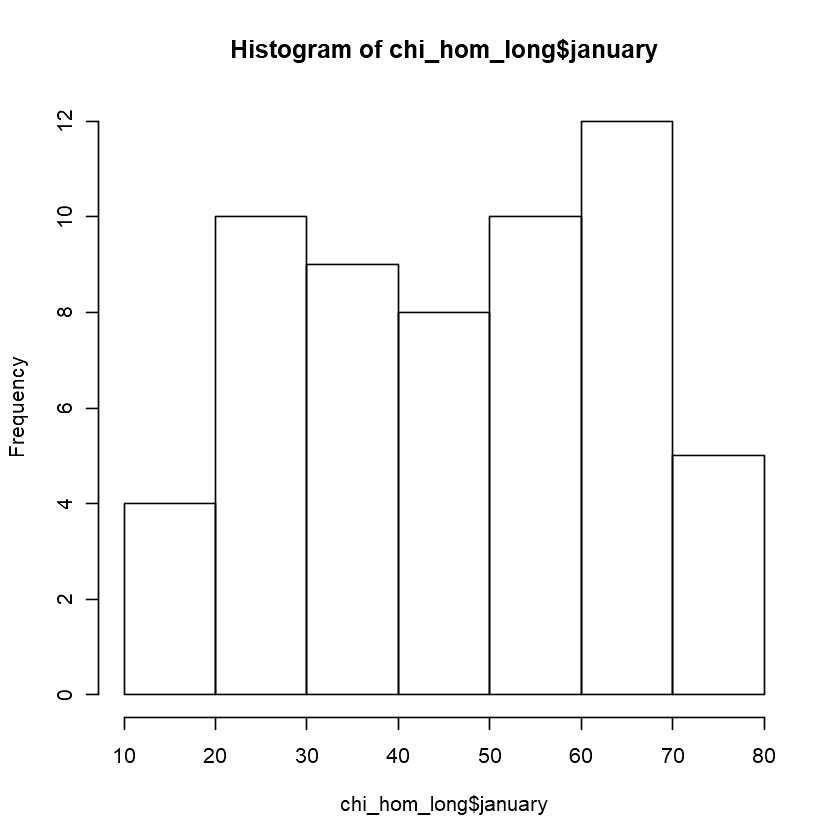

  [1]  2.40  1.17 -2.21  0.53  1.50  2.53 -5.90 -1.53 -1.05 -6.78  2.07  0.34
 [13] -4.00 -0.72  3.12  0.21 -2.84  0.81  0.22  1.62  1.41  1.14  1.43  1.14
 [25]  0.16  4.26  0.91 -0.55  2.19 -1.02 -1.24  2.83 -3.26 -2.59  1.38 -4.47
 [37]  3.29  2.24 -1.84 -1.02  0.26 -1.59 -1.67 -0.71  2.90 -1.52  3.17  0.62
 [49]  0.76 -4.53 -1.00  1.31  2.16  3.60  0.03  0.02 -2.28  1.31  0.36 -1.64
 [61] -0.40  0.29  0.83 -0.93 -0.60 -0.91  9.81  2.24 -2.17 -0.16  3.29  0.33
 [73] -0.86  2.36  2.19 -0.16 -0.33  1.43  1.69 -0.76 -1.29  1.28 -0.81 -4.97
 [85]  2.26 -2.91  4.17  1.10 -1.95  4.34 -2.19 -0.95 -1.22 -5.29  1.07 -3.12
 [97] -3.07 -3.45  1.02 -3.97 -1.28 -1.81  0.17  1.57  0.60  1.00 -0.71  2.59
[109] -0.45 -4.53 -1.17 -0.79  3.93 -0.88 -0.72  1.02 -1.24  3.98  4.07  0.31
[121] -0.66 -1.31  2.47  3.67 -4.09  3.64 -0.40 -1.71  2.52  5.91 -0.21  1.19
[133]  3.74  0.14 -0.12  1.45 -0.36 -0.60 -1.43 -0.72  3.52 -0.19 -1.10  2.45
[145]  3.59  1.97  0.16  1.41  0.48 -0.14  2.55  3.69  0.03 -1.6

[1] 46.51836

   97.5%     2.5% 
42.04957 50.89828 


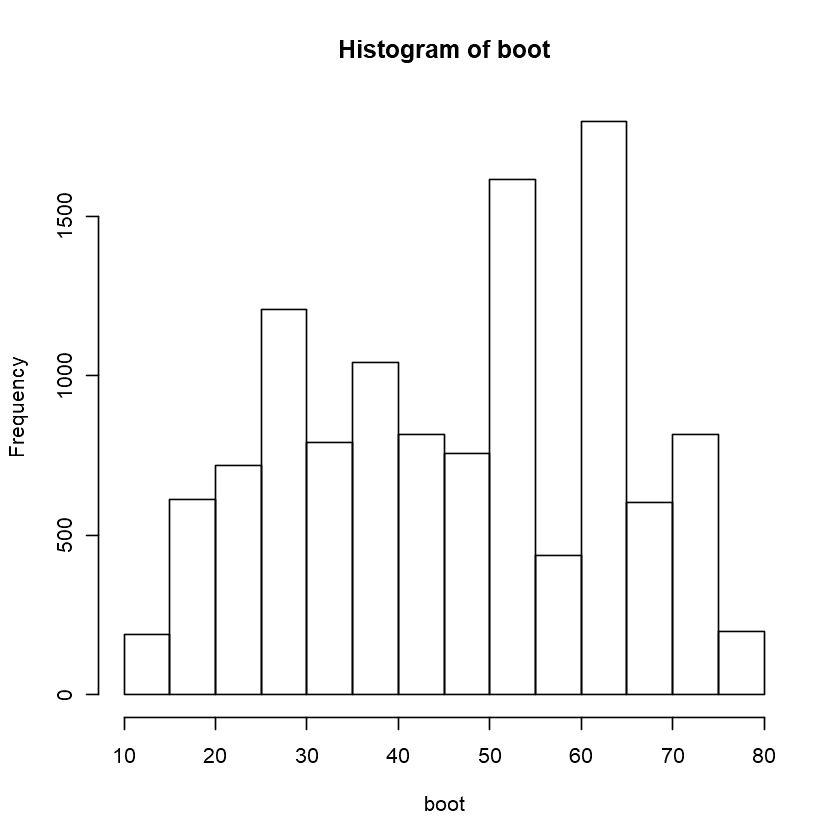

In [12]:
chi_hom_long = read.csv("chi_murder.csv")
chi_hom_long = select(chi_hom_long,-X) # remove artifact column
head(chi_hom_long)
rownames(chi_hom_long) = chi_hom_long[,1] # convert first row to the row name (year)
chi_hom_long = select(chi_hom_long,-year) # remove year column
dim(chi_hom_long)
chi_hom_long = chi_hom_long[-59,] # remove 2015 data since we do not have observatiosn for some moths in this year

plot(colMeans(chi_hom_long, na.rm = T), type="l", xlab="Month", ylab = "Average Murder")
plot(rownames(chi_hom_long),rowMeans(chi_hom_long, na.rm = T), type="l", xlab="Year", ylab="Average Murder")

# Calculate bootstrap CI
hist(chi_hom_long$january)
x = mean(chi_hom_long$january)
sample(chi_hom_long$january, length(chi_hom_long$january), replace = TRUE, prob = NULL)
boot = replicate(200, sample(chi_hom_long$january, length(chi_hom_long$january), replace = TRUE, prob = NULL))
hist(boot)
boot = matrix(boot, nrow = length(chi_hom_long$january))
delt = colMeans(boot) - x
print(delt, digits = 1)
mean(colMeans(boot))
d = quantile(delt, c(0.025, .975))
ci = (x - c(d[2], d[1]))
print(ci)

In [13]:
# Calculate t-ratio CI
mu = mean(chi_hom_long$january)
sd = sd(chi_hom_long$january)
n = sqrt(length(chi_hom_long$january))
ci2low = mu - 1.96 *(sd / n)
ci2up = mu + 1.96 *(sd / n)
print(ci2low)
print(ci2up)

[1] 41.8446
[1] 50.77609


Part D.i

In [14]:
mu = mean(chi_hom_long$january)
sd = sd(chi_hom_long$january)
pnorm(52, mean = mu, sd = sd, lower.tail = F)

[1] 0.3714957

Assuming the data is normal, the probability of 52 or more homicides is 37.1%

Part D.ii

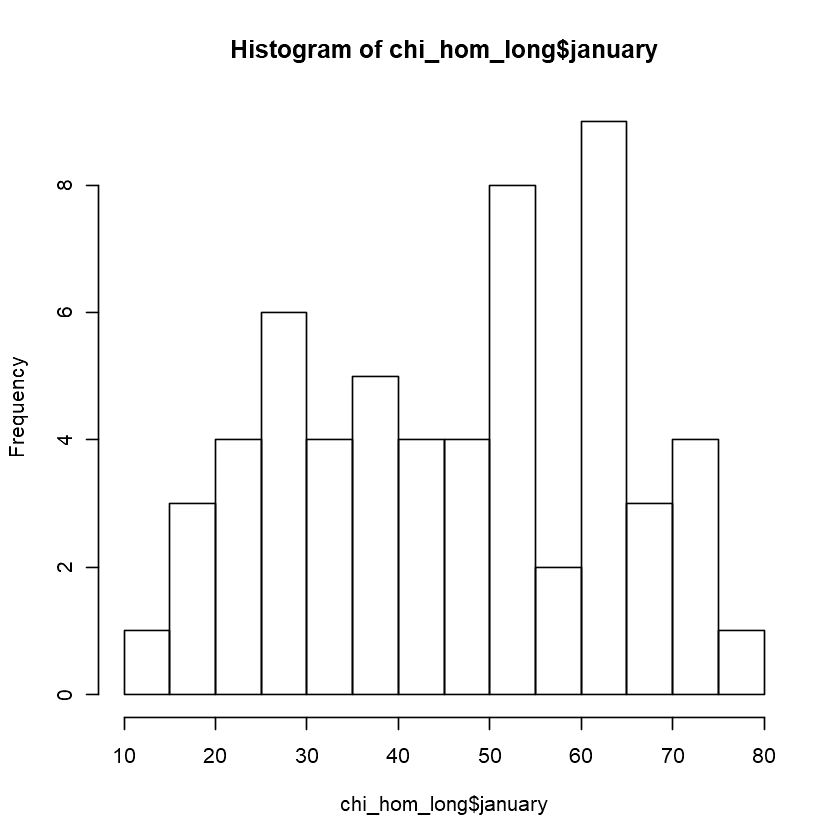

In [15]:
hist(chi_hom_long$january, breaks = 20)

The data is far from normal and is tilted towards a higher number homicides per year, with the highest number of years between 50 and 65.

Part D.iii

In [16]:
ppois(52,mu, lower.tail = F)

[1] 0.180261

Assuming the data follows a Poisson distribution, there is a 18.0% chance of 52 or more homicides occuring

Part E


Call:
lm(formula = chi_hom_jan$homocide ~ chi_temp$MaxAvg)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6493  -6.6493  -0.9347   4.1720  21.1009 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)
(Intercept)      16.7907    13.7529   1.221    0.241
chi_temp$MaxAvg   0.3929     0.3119   1.260    0.227

Residual standard error: 10.39 on 15 degrees of freedom
Multiple R-squared:  0.09569,	Adjusted R-squared:  0.0354 
F-statistic: 1.587 on 1 and 15 DF,  p-value: 0.227


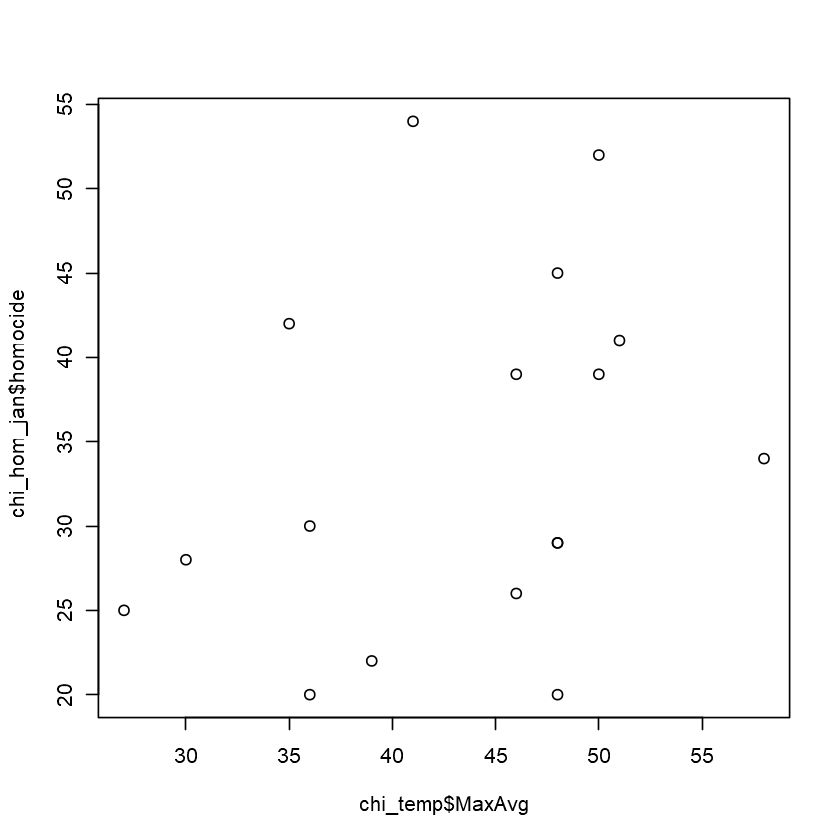

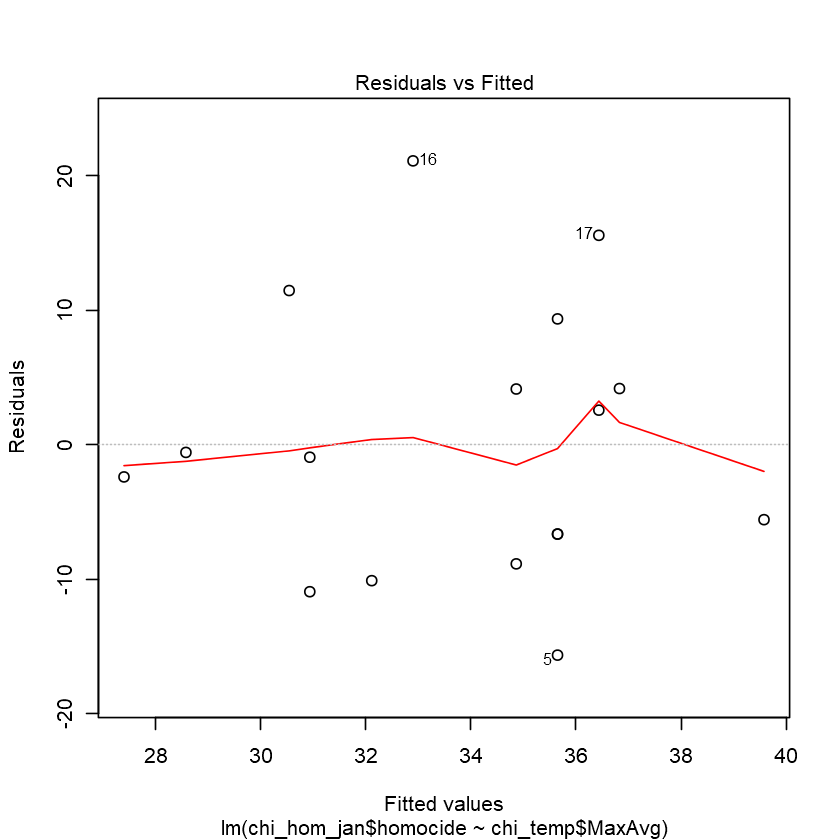

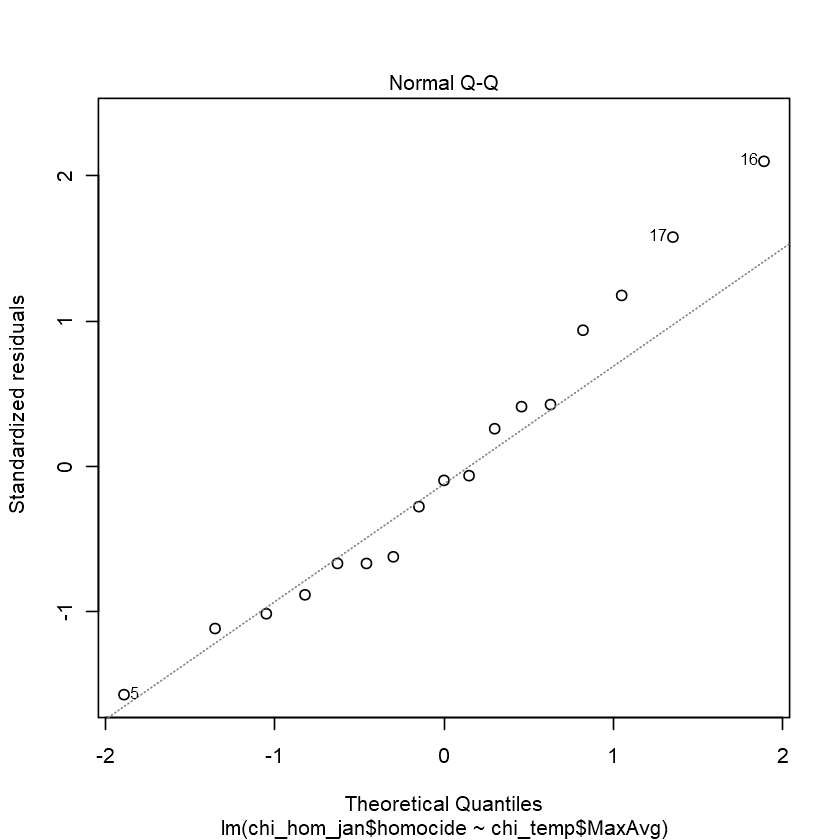

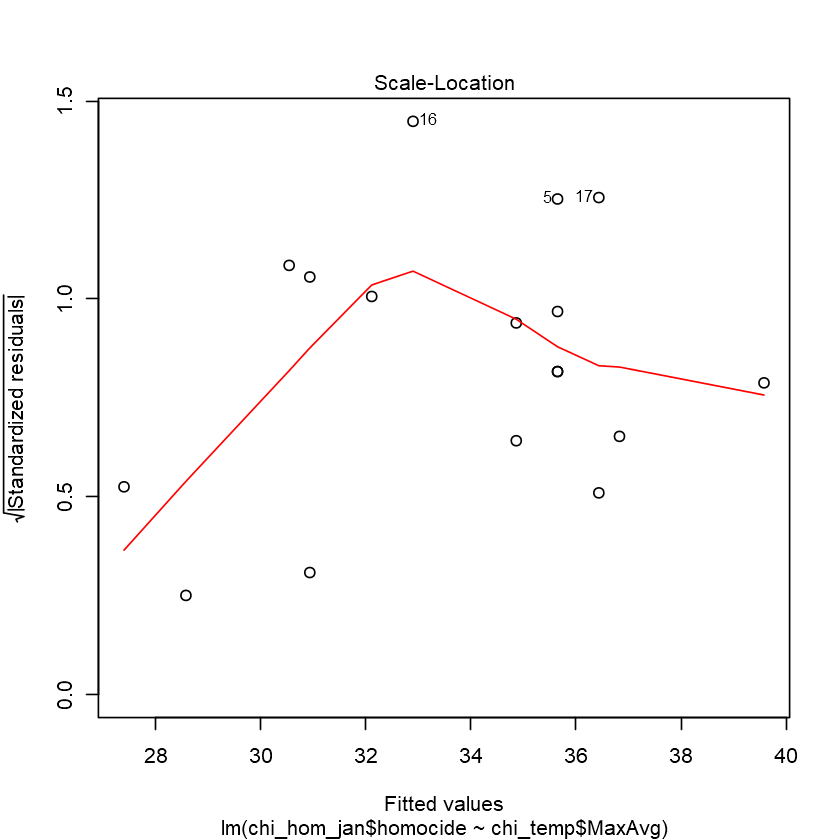

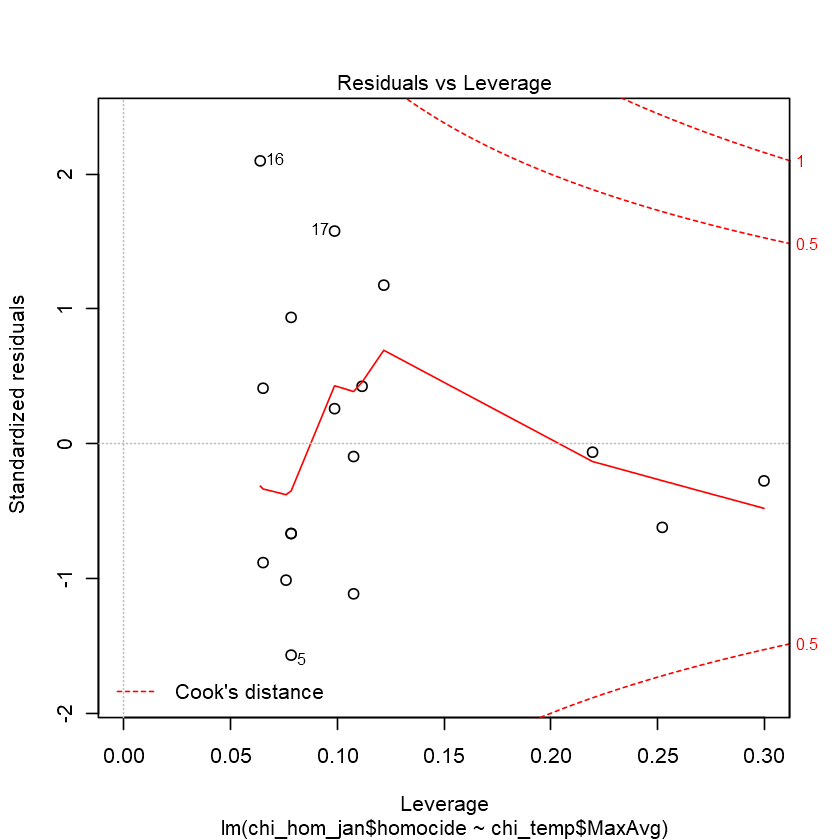

In [17]:
chi_temp = read.csv("chi_temp.csv")
plot(chi_temp$MaxAvg, chi_hom_jan$homocide)
model = lm(chi_hom_jan$homocide ~ chi_temp$MaxAvg)
summary(model)
plot(model)

The relationship between temperatures and homicides is not significant. The p-value of the MaxAvg predictor is 0.227, well above the recommended value of 0.05. Additionally, the model has a very low r-squared of 0.096 (with an adjusted r-squared of 0.0354) and an examination of the two values plotted together shows no correlation. The model was not thrown off by outliers because examination of all four diagnostic plots show a relatively well-functioning model. 2005, 2016, and 2017 are the biggest leverage points in the model but none of them have a Cook's distance of greater than one, meaning they are not high leverage.

Part F

In [18]:
# add unique day idenityer
chi_hom$day = (chi_hom$Year - 2001)*365 + lubridate::yday(chi_hom$DateTime)
chi_hom = arrange(chi_hom, day)
head(chi_hom)
chi_hom_before_nov15 = chi_hom %>% group_by(day) %>% filter(DateTime <=as.POSIXct("2015-11-24")) %>% summarise( homicide = n())
chi_hom_after_nov15 = chi_hom %>% group_by(day) %>% filter(DateTime >=as.POSIXct("2015-11-24")) %>% summarise( homicide = n())

mean(chi_hom_before_nov15$homicide)
mean(chi_hom_after_nov15$homicide)

t.test(chi_hom_before_nov15$homicide, chi_hom_after_nov15$homicide, alternative = "less")

ID,Case.Number,Block,IUCR,Primary.Type,Description,Location.Description,Arrest,Domestic,Beat,District,Ward,Community.Area,FBI.Code,Year,Latitude,Longitude,DateTime,Month,day
634,G000705,024XX W MONROE ST,0110,HOMICIDE,FIRST DEGREE MURDER,CHA STAIRWELL,false,false,1125,11,2,28,01A,2001,41.88022,-87.68825,2001-01-01 10:40:00,1,1
635,F803142,023XX N MILWAUKEE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,false,false,1414,14,35,22,01A,2001,41.92449,-87.69993,2001-01-01 15:10:00,1,1
643,D362053,002XX E 46 ST,0110,HOMICIDE,FIRST DEGREE MURDER,ABANDONED BUILDING,false,false,221,2,NA,NA,01A,2001,41.81113,-87.62079,2001-01-04 22:05:00,1,4
636,G008548,035XX W 12 PL,0110,HOMICIDE,FIRST DEGREE MURDER,BASEMENT,true,false,1021,10,NA,NA,01A,2001,41.86516,-87.71373,2001-01-04 22:30:00,1,4
638,G008793,016XX W 80 ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,false,false,611,6,NA,NA,01A,2001,41.74851,-87.66493,2001-01-05 16:22:00,1,5
639,G011288,017XX S ASHLAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,false,false,1222,12,25,31,01A,2001,41.85847,-87.66617,2001-01-06 08:54:00,1,6


[1] 1.933212

[1] 2.414698


	Welch Two Sample t-test

data:  chi_hom_before_nov15$homicide and chi_hom_after_nov15$homicide
t = -6.1708, df = 429.96, p-value = 7.856e-10
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
       -Inf -0.3528674
sample estimates:
mean of x mean of y 
 1.933212  2.414698 


The p-value for this t-test is 7.856e-10, which is well below 0.05. Therefore we reject the null hypothesis that the video did not affect the homicide rate. The video release and the pullback in proactive policing that followed was at least partially responsible for the increase in crime.